In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta

In [2]:
# from google.colab import files

# data.to_csv('test.csv', index=False)
# files.download('test.csv')

In [3]:
# 우선 하나의 독립변수에 대한 시계열 분석을 위해 적합한 ARIMA 모델을 활용한 인구밀집도 예측을 할 예정.

In [4]:
s_2207 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Github/dataset/s2207.csv")
s_2208 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Github/dataset/s2208.csv")
s_2209 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Github/dataset/s2209.csv")
s_2210 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Github/dataset/s2210.csv")
s_2211 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Github/dataset/s2211.csv")
s_2212 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Github/dataset/s2212.csv")
s_2301 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Github/dataset/s2301.csv")
s_2302 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Github/dataset/s2302.csv")
s_2303 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Github/dataset/s2303.csv")
s_2304 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Github/dataset/s2304.csv")
s_2305 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Github/dataset/s2305.csv")
s_2306 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Github/dataset/s2306.csv")

In [5]:
s_2207 = s_2207.rename(columns={
    '기준일ID': 'Date',
    '시간대구분': 'Time',
    '행정동코드': 'RegionCode',
    '총생활인구수': 'TotalPop',
    '남자0세부터9세생활인구수': 'm0to9',
    '남자10세부터14세생활인구수': 'm10to14',
    '남자15세부터19세생활인구수': 'm15to19',
    '남자20세부터24세생활인구수': 'm20to24',
    '남자25세부터29세생활인구수': 'm25to29',
    '남자30세부터34세생활인구수': 'm30to34',
    '남자35세부터39세생활인구수': 'm35to39',
    '남자40세부터44세생활인구수': 'm40to44',
    '남자45세부터49세생활인구수': 'm45to49',
    '남자50세부터54세생활인구수': 'm50to54',
    '남자55세부터59세생활인구수': 'm55to59',
    '남자60세부터64세생활인구수': 'm60to64',
    '남자65세부터69세생활인구수': 'm65to69',
    '남자70세이상생활인구수': 'm70plus',
    '여자0세부터9세생활인구수': 'w0to9',
    '여자10세부터14세생활인구수': 'w10to14',
    '여자15세부터19세생활인구수': 'w15to19',
    '여자20세부터24세생활인구수': 'w20to24',
    '여자25세부터29세생활인구수': 'w25to29',
    '여자30세부터34세생활인구수': 'w30to34',
    '여자35세부터39세생활인구수': 'w35to39',
    '여자40세부터44세생활인구수': 'w40to44',
    '여자45세부터49세생활인구수': 'w45to49',
    '여자50세부터54세생활인구수': 'w50to54',
    '여자55세부터59세생활인구수': 'w55to59',
    '여자60세부터64세생활인구수': 'w60to64',
    '여자65세부터69세생활인구수': 'w65to69',
    '여자70세이상생활인구수': 'w70plus'
})

In [6]:
s_2207

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
20220701,0,11740560,20846.9243,818.9991,607.4987,601.4973,458.5558,478.6953,575.3735,1091.1438,...,687.2636,1206.1899,983.9243,997.7539,674.5397,858.1682,632.0105,595.9335,1387.4420,NaN
20220701,0,11320681,15736.8591,638.6480,427.2095,543.0753,387.3929,406.7258,364.0340,494.3973,...,437.4816,592.3657,566.3815,672.5752,778.0874,808.5344,767.0374,511.8369,1078.2873,NaN
20220701,0,11710642,33484.9306,590.5560,259.1215,547.6122,1168.0764,1615.7321,2020.5939,2413.0372,...,2353.4380,2086.2610,1531.5239,1242.8944,1026.7279,874.3376,896.8396,677.9346,1376.9081,NaN
20220701,0,11215820,26227.6887,556.0031,339.0859,670.3329,1095.8110,1373.8865,1309.0986,1161.8562,...,1265.1292,1199.6805,1007.9460,980.0437,901.0732,1103.1327,883.9014,574.5393,1407.9589,NaN
20220701,0,11230545,31948.4742,890.8261,425.6721,690.1825,1868.8605,1681.8415,980.2639,1048.6251,...,944.3268,933.5843,851.9271,1020.5819,915.2205,1052.1750,956.0412,1001.1059,2609.3887,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220731,23,11140615,24152.7596,144.4987,105.2936,228.4234,775.0644,1430.7860,1674.4897,1858.2441,...,1288.7435,1411.6259,1177.3327,1060.5672,888.4488,954.5904,773.8641,457.1925,973.2884,NaN
20220731,23,11230710,18702.8045,370.9141,181.3097,556.0677,1679.7651,1197.8983,681.2906,509.6389,...,543.1042,549.7611,472.5698,501.5160,480.9597,503.2399,431.1500,424.6274,1254.4966,NaN
20220731,23,11710550,16285.3724,518.7068,311.2234,401.0656,431.2163,557.7115,590.6219,552.1274,...,543.9800,551.5594,486.0225,578.0346,675.5376,765.6041,831.1999,525.2088,1349.9905,NaN
20220731,23,11710580,30229.0999,1181.4199,483.4989,608.1389,787.7194,1501.7294,1631.2134,1669.8746,...,1754.0432,1597.1977,1263.6023,1207.2093,996.7023,1159.7473,988.9106,772.9636,1542.8214,NaN


In [7]:
s_2208 = s_2208.rename(columns={
    '기준일ID': 'Date',
    '시간대구분': 'Time',
    '행정동코드': 'RegionCode',
    '총생활인구수': 'TotalPop',
    '남자0세부터9세생활인구수': 'm0to9',
    '남자10세부터14세생활인구수': 'm10to14',
    '남자15세부터19세생활인구수': 'm15to19',
    '남자20세부터24세생활인구수': 'm20to24',
    '남자25세부터29세생활인구수': 'm25to29',
    '남자30세부터34세생활인구수': 'm30to34',
    '남자35세부터39세생활인구수': 'm35to39',
    '남자40세부터44세생활인구수': 'm40to44',
    '남자45세부터49세생활인구수': 'm45to49',
    '남자50세부터54세생활인구수': 'm50to54',
    '남자55세부터59세생활인구수': 'm55to59',
    '남자60세부터64세생활인구수': 'm60to64',
    '남자65세부터69세생활인구수': 'm65to69',
    '남자70세이상생활인구수': 'm70plus',
    '여자0세부터9세생활인구수': 'w0to9',
    '여자10세부터14세생활인구수': 'w10to14',
    '여자15세부터19세생활인구수': 'w15to19',
    '여자20세부터24세생활인구수': 'w20to24',
    '여자25세부터29세생활인구수': 'w25to29',
    '여자30세부터34세생활인구수': 'w30to34',
    '여자35세부터39세생활인구수': 'w35to39',
    '여자40세부터44세생활인구수': 'w40to44',
    '여자45세부터49세생활인구수': 'w45to49',
    '여자50세부터54세생활인구수': 'w50to54',
    '여자55세부터59세생활인구수': 'w55to59',
    '여자60세부터64세생활인구수': 'w60to64',
    '여자65세부터69세생활인구수': 'w65to69',
    '여자70세이상생활인구수': 'w70plus'
})
s_2209 = s_2209.rename(columns={
    '기준일ID': 'Date',
    '시간대구분': 'Time',
    '행정동코드': 'RegionCode',
    '총생활인구수': 'TotalPop',
    '남자0세부터9세생활인구수': 'm0to9',
    '남자10세부터14세생활인구수': 'm10to14',
    '남자15세부터19세생활인구수': 'm15to19',
    '남자20세부터24세생활인구수': 'm20to24',
    '남자25세부터29세생활인구수': 'm25to29',
    '남자30세부터34세생활인구수': 'm30to34',
    '남자35세부터39세생활인구수': 'm35to39',
    '남자40세부터44세생활인구수': 'm40to44',
    '남자45세부터49세생활인구수': 'm45to49',
    '남자50세부터54세생활인구수': 'm50to54',
    '남자55세부터59세생활인구수': 'm55to59',
    '남자60세부터64세생활인구수': 'm60to64',
    '남자65세부터69세생활인구수': 'm65to69',
    '남자70세이상생활인구수': 'm70plus',
    '여자0세부터9세생활인구수': 'w0to9',
    '여자10세부터14세생활인구수': 'w10to14',
    '여자15세부터19세생활인구수': 'w15to19',
    '여자20세부터24세생활인구수': 'w20to24',
    '여자25세부터29세생활인구수': 'w25to29',
    '여자30세부터34세생활인구수': 'w30to34',
    '여자35세부터39세생활인구수': 'w35to39',
    '여자40세부터44세생활인구수': 'w40to44',
    '여자45세부터49세생활인구수': 'w45to49',
    '여자50세부터54세생활인구수': 'w50to54',
    '여자55세부터59세생활인구수': 'w55to59',
    '여자60세부터64세생활인구수': 'w60to64',
    '여자65세부터69세생활인구수': 'w65to69',
    '여자70세이상생활인구수': 'w70plus'
})
s_2210 = s_2210.rename(columns={
    '기준일ID': 'Date',
    '시간대구분': 'Time',
    '행정동코드': 'RegionCode',
    '총생활인구수': 'TotalPop',
    '남자0세부터9세생활인구수': 'm0to9',
    '남자10세부터14세생활인구수': 'm10to14',
    '남자15세부터19세생활인구수': 'm15to19',
    '남자20세부터24세생활인구수': 'm20to24',
    '남자25세부터29세생활인구수': 'm25to29',
    '남자30세부터34세생활인구수': 'm30to34',
    '남자35세부터39세생활인구수': 'm35to39',
    '남자40세부터44세생활인구수': 'm40to44',
    '남자45세부터49세생활인구수': 'm45to49',
    '남자50세부터54세생활인구수': 'm50to54',
    '남자55세부터59세생활인구수': 'm55to59',
    '남자60세부터64세생활인구수': 'm60to64',
    '남자65세부터69세생활인구수': 'm65to69',
    '남자70세이상생활인구수': 'm70plus',
    '여자0세부터9세생활인구수': 'w0to9',
    '여자10세부터14세생활인구수': 'w10to14',
    '여자15세부터19세생활인구수': 'w15to19',
    '여자20세부터24세생활인구수': 'w20to24',
    '여자25세부터29세생활인구수': 'w25to29',
    '여자30세부터34세생활인구수': 'w30to34',
    '여자35세부터39세생활인구수': 'w35to39',
    '여자40세부터44세생활인구수': 'w40to44',
    '여자45세부터49세생활인구수': 'w45to49',
    '여자50세부터54세생활인구수': 'w50to54',
    '여자55세부터59세생활인구수': 'w55to59',
    '여자60세부터64세생활인구수': 'w60to64',
    '여자65세부터69세생활인구수': 'w65to69',
    '여자70세이상생활인구수': 'w70plus'
})
s_2211 = s_2211.rename(columns={
    '기준일ID': 'Date',
    '시간대구분': 'Time',
    '행정동코드': 'RegionCode',
    '총생활인구수': 'TotalPop',
    '남자0세부터9세생활인구수': 'm0to9',
    '남자10세부터14세생활인구수': 'm10to14',
    '남자15세부터19세생활인구수': 'm15to19',
    '남자20세부터24세생활인구수': 'm20to24',
    '남자25세부터29세생활인구수': 'm25to29',
    '남자30세부터34세생활인구수': 'm30to34',
    '남자35세부터39세생활인구수': 'm35to39',
    '남자40세부터44세생활인구수': 'm40to44',
    '남자45세부터49세생활인구수': 'm45to49',
    '남자50세부터54세생활인구수': 'm50to54',
    '남자55세부터59세생활인구수': 'm55to59',
    '남자60세부터64세생활인구수': 'm60to64',
    '남자65세부터69세생활인구수': 'm65to69',
    '남자70세이상생활인구수': 'm70plus',
    '여자0세부터9세생활인구수': 'w0to9',
    '여자10세부터14세생활인구수': 'w10to14',
    '여자15세부터19세생활인구수': 'w15to19',
    '여자20세부터24세생활인구수': 'w20to24',
    '여자25세부터29세생활인구수': 'w25to29',
    '여자30세부터34세생활인구수': 'w30to34',
    '여자35세부터39세생활인구수': 'w35to39',
    '여자40세부터44세생활인구수': 'w40to44',
    '여자45세부터49세생활인구수': 'w45to49',
    '여자50세부터54세생활인구수': 'w50to54',
    '여자55세부터59세생활인구수': 'w55to59',
    '여자60세부터64세생활인구수': 'w60to64',
    '여자65세부터69세생활인구수': 'w65to69',
    '여자70세이상생활인구수': 'w70plus'
})
s_2212 = s_2212.rename(columns={
    '기준일ID': 'Date',
    '시간대구분': 'Time',
    '행정동코드': 'RegionCode',
    '총생활인구수': 'TotalPop',
    '남자0세부터9세생활인구수': 'm0to9',
    '남자10세부터14세생활인구수': 'm10to14',
    '남자15세부터19세생활인구수': 'm15to19',
    '남자20세부터24세생활인구수': 'm20to24',
    '남자25세부터29세생활인구수': 'm25to29',
    '남자30세부터34세생활인구수': 'm30to34',
    '남자35세부터39세생활인구수': 'm35to39',
    '남자40세부터44세생활인구수': 'm40to44',
    '남자45세부터49세생활인구수': 'm45to49',
    '남자50세부터54세생활인구수': 'm50to54',
    '남자55세부터59세생활인구수': 'm55to59',
    '남자60세부터64세생활인구수': 'm60to64',
    '남자65세부터69세생활인구수': 'm65to69',
    '남자70세이상생활인구수': 'm70plus',
    '여자0세부터9세생활인구수': 'w0to9',
    '여자10세부터14세생활인구수': 'w10to14',
    '여자15세부터19세생활인구수': 'w15to19',
    '여자20세부터24세생활인구수': 'w20to24',
    '여자25세부터29세생활인구수': 'w25to29',
    '여자30세부터34세생활인구수': 'w30to34',
    '여자35세부터39세생활인구수': 'w35to39',
    '여자40세부터44세생활인구수': 'w40to44',
    '여자45세부터49세생활인구수': 'w45to49',
    '여자50세부터54세생활인구수': 'w50to54',
    '여자55세부터59세생활인구수': 'w55to59',
    '여자60세부터64세생활인구수': 'w60to64',
    '여자65세부터69세생활인구수': 'w65to69',
    '여자70세이상생활인구수': 'w70plus'
})
s_2301 = s_2301.rename(columns={
    '기준일ID': 'Date',
    '시간대구분': 'Time',
    '행정동코드': 'RegionCode',
    '총생활인구수': 'TotalPop',
    '남자0세부터9세생활인구수': 'm0to9',
    '남자10세부터14세생활인구수': 'm10to14',
    '남자15세부터19세생활인구수': 'm15to19',
    '남자20세부터24세생활인구수': 'm20to24',
    '남자25세부터29세생활인구수': 'm25to29',
    '남자30세부터34세생활인구수': 'm30to34',
    '남자35세부터39세생활인구수': 'm35to39',
    '남자40세부터44세생활인구수': 'm40to44',
    '남자45세부터49세생활인구수': 'm45to49',
    '남자50세부터54세생활인구수': 'm50to54',
    '남자55세부터59세생활인구수': 'm55to59',
    '남자60세부터64세생활인구수': 'm60to64',
    '남자65세부터69세생활인구수': 'm65to69',
    '남자70세이상생활인구수': 'm70plus',
    '여자0세부터9세생활인구수': 'w0to9',
    '여자10세부터14세생활인구수': 'w10to14',
    '여자15세부터19세생활인구수': 'w15to19',
    '여자20세부터24세생활인구수': 'w20to24',
    '여자25세부터29세생활인구수': 'w25to29',
    '여자30세부터34세생활인구수': 'w30to34',
    '여자35세부터39세생활인구수': 'w35to39',
    '여자40세부터44세생활인구수': 'w40to44',
    '여자45세부터49세생활인구수': 'w45to49',
    '여자50세부터54세생활인구수': 'w50to54',
    '여자55세부터59세생활인구수': 'w55to59',
    '여자60세부터64세생활인구수': 'w60to64',
    '여자65세부터69세생활인구수': 'w65to69',
    '여자70세이상생활인구수': 'w70plus'
})
s_2302 = s_2302.rename(columns={
    '기준일ID': 'Date',
    '시간대구분': 'Time',
    '행정동코드': 'RegionCode',
    '총생활인구수': 'TotalPop',
    '남자0세부터9세생활인구수': 'm0to9',
    '남자10세부터14세생활인구수': 'm10to14',
    '남자15세부터19세생활인구수': 'm15to19',
    '남자20세부터24세생활인구수': 'm20to24',
    '남자25세부터29세생활인구수': 'm25to29',
    '남자30세부터34세생활인구수': 'm30to34',
    '남자35세부터39세생활인구수': 'm35to39',
    '남자40세부터44세생활인구수': 'm40to44',
    '남자45세부터49세생활인구수': 'm45to49',
    '남자50세부터54세생활인구수': 'm50to54',
    '남자55세부터59세생활인구수': 'm55to59',
    '남자60세부터64세생활인구수': 'm60to64',
    '남자65세부터69세생활인구수': 'm65to69',
    '남자70세이상생활인구수': 'm70plus',
    '여자0세부터9세생활인구수': 'w0to9',
    '여자10세부터14세생활인구수': 'w10to14',
    '여자15세부터19세생활인구수': 'w15to19',
    '여자20세부터24세생활인구수': 'w20to24',
    '여자25세부터29세생활인구수': 'w25to29',
    '여자30세부터34세생활인구수': 'w30to34',
    '여자35세부터39세생활인구수': 'w35to39',
    '여자40세부터44세생활인구수': 'w40to44',
    '여자45세부터49세생활인구수': 'w45to49',
    '여자50세부터54세생활인구수': 'w50to54',
    '여자55세부터59세생활인구수': 'w55to59',
    '여자60세부터64세생활인구수': 'w60to64',
    '여자65세부터69세생활인구수': 'w65to69',
    '여자70세이상생활인구수': 'w70plus'
})
s_2303 = s_2303.rename(columns={
    '기준일ID': 'Date',
    '시간대구분': 'Time',
    '행정동코드': 'RegionCode',
    '총생활인구수': 'TotalPop',
    '남자0세부터9세생활인구수': 'm0to9',
    '남자10세부터14세생활인구수': 'm10to14',
    '남자15세부터19세생활인구수': 'm15to19',
    '남자20세부터24세생활인구수': 'm20to24',
    '남자25세부터29세생활인구수': 'm25to29',
    '남자30세부터34세생활인구수': 'm30to34',
    '남자35세부터39세생활인구수': 'm35to39',
    '남자40세부터44세생활인구수': 'm40to44',
    '남자45세부터49세생활인구수': 'm45to49',
    '남자50세부터54세생활인구수': 'm50to54',
    '남자55세부터59세생활인구수': 'm55to59',
    '남자60세부터64세생활인구수': 'm60to64',
    '남자65세부터69세생활인구수': 'm65to69',
    '남자70세이상생활인구수': 'm70plus',
    '여자0세부터9세생활인구수': 'w0to9',
    '여자10세부터14세생활인구수': 'w10to14',
    '여자15세부터19세생활인구수': 'w15to19',
    '여자20세부터24세생활인구수': 'w20to24',
    '여자25세부터29세생활인구수': 'w25to29',
    '여자30세부터34세생활인구수': 'w30to34',
    '여자35세부터39세생활인구수': 'w35to39',
    '여자40세부터44세생활인구수': 'w40to44',
    '여자45세부터49세생활인구수': 'w45to49',
    '여자50세부터54세생활인구수': 'w50to54',
    '여자55세부터59세생활인구수': 'w55to59',
    '여자60세부터64세생활인구수': 'w60to64',
    '여자65세부터69세생활인구수': 'w65to69',
    '여자70세이상생활인구수': 'w70plus'
})
s_2304 = s_2304.rename(columns={
    '기준일ID': 'Date',
    '시간대구분': 'Time',
    '행정동코드': 'RegionCode',
    '총생활인구수': 'TotalPop',
    '남자0세부터9세생활인구수': 'm0to9',
    '남자10세부터14세생활인구수': 'm10to14',
    '남자15세부터19세생활인구수': 'm15to19',
    '남자20세부터24세생활인구수': 'm20to24',
    '남자25세부터29세생활인구수': 'm25to29',
    '남자30세부터34세생활인구수': 'm30to34',
    '남자35세부터39세생활인구수': 'm35to39',
    '남자40세부터44세생활인구수': 'm40to44',
    '남자45세부터49세생활인구수': 'm45to49',
    '남자50세부터54세생활인구수': 'm50to54',
    '남자55세부터59세생활인구수': 'm55to59',
    '남자60세부터64세생활인구수': 'm60to64',
    '남자65세부터69세생활인구수': 'm65to69',
    '남자70세이상생활인구수': 'm70plus',
    '여자0세부터9세생활인구수': 'w0to9',
    '여자10세부터14세생활인구수': 'w10to14',
    '여자15세부터19세생활인구수': 'w15to19',
    '여자20세부터24세생활인구수': 'w20to24',
    '여자25세부터29세생활인구수': 'w25to29',
    '여자30세부터34세생활인구수': 'w30to34',
    '여자35세부터39세생활인구수': 'w35to39',
    '여자40세부터44세생활인구수': 'w40to44',
    '여자45세부터49세생활인구수': 'w45to49',
    '여자50세부터54세생활인구수': 'w50to54',
    '여자55세부터59세생활인구수': 'w55to59',
    '여자60세부터64세생활인구수': 'w60to64',
    '여자65세부터69세생활인구수': 'w65to69',
    '여자70세이상생활인구수': 'w70plus'
})
s_2305 = s_2305.rename(columns={
    '기준일ID': 'Date',
    '시간대구분': 'Time',
    '행정동코드': 'RegionCode',
    '총생활인구수': 'TotalPop',
    '남자0세부터9세생활인구수': 'm0to9',
    '남자10세부터14세생활인구수': 'm10to14',
    '남자15세부터19세생활인구수': 'm15to19',
    '남자20세부터24세생활인구수': 'm20to24',
    '남자25세부터29세생활인구수': 'm25to29',
    '남자30세부터34세생활인구수': 'm30to34',
    '남자35세부터39세생활인구수': 'm35to39',
    '남자40세부터44세생활인구수': 'm40to44',
    '남자45세부터49세생활인구수': 'm45to49',
    '남자50세부터54세생활인구수': 'm50to54',
    '남자55세부터59세생활인구수': 'm55to59',
    '남자60세부터64세생활인구수': 'm60to64',
    '남자65세부터69세생활인구수': 'm65to69',
    '남자70세이상생활인구수': 'm70plus',
    '여자0세부터9세생활인구수': 'w0to9',
    '여자10세부터14세생활인구수': 'w10to14',
    '여자15세부터19세생활인구수': 'w15to19',
    '여자20세부터24세생활인구수': 'w20to24',
    '여자25세부터29세생활인구수': 'w25to29',
    '여자30세부터34세생활인구수': 'w30to34',
    '여자35세부터39세생활인구수': 'w35to39',
    '여자40세부터44세생활인구수': 'w40to44',
    '여자45세부터49세생활인구수': 'w45to49',
    '여자50세부터54세생활인구수': 'w50to54',
    '여자55세부터59세생활인구수': 'w55to59',
    '여자60세부터64세생활인구수': 'w60to64',
    '여자65세부터69세생활인구수': 'w65to69',
    '여자70세이상생활인구수': 'w70plus'
})
s_2306 = s_2306.rename(columns={
    '기준일ID': 'Date',
    '시간대구분': 'Time',
    '행정동코드': 'RegionCode',
    '총생활인구수': 'TotalPop',
    '남자0세부터9세생활인구수': 'm0to9',
    '남자10세부터14세생활인구수': 'm10to14',
    '남자15세부터19세생활인구수': 'm15to19',
    '남자20세부터24세생활인구수': 'm20to24',
    '남자25세부터29세생활인구수': 'm25to29',
    '남자30세부터34세생활인구수': 'm30to34',
    '남자35세부터39세생활인구수': 'm35to39',
    '남자40세부터44세생활인구수': 'm40to44',
    '남자45세부터49세생활인구수': 'm45to49',
    '남자50세부터54세생활인구수': 'm50to54',
    '남자55세부터59세생활인구수': 'm55to59',
    '남자60세부터64세생활인구수': 'm60to64',
    '남자65세부터69세생활인구수': 'm65to69',
    '남자70세이상생활인구수': 'm70plus',
    '여자0세부터9세생활인구수': 'w0to9',
    '여자10세부터14세생활인구수': 'w10to14',
    '여자15세부터19세생활인구수': 'w15to19',
    '여자20세부터24세생활인구수': 'w20to24',
    '여자25세부터29세생활인구수': 'w25to29',
    '여자30세부터34세생활인구수': 'w30to34',
    '여자35세부터39세생활인구수': 'w35to39',
    '여자40세부터44세생활인구수': 'w40to44',
    '여자45세부터49세생활인구수': 'w45to49',
    '여자50세부터54세생활인구수': 'w50to54',
    '여자55세부터59세생활인구수': 'w55to59',
    '여자60세부터64세생활인구수': 'w60to64',
    '여자65세부터69세생활인구수': 'w65to69',
    '여자70세이상생활인구수': 'w70plus'
})

In [8]:
s_2207.head()

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
20220701,0,11740560,20846.9243,818.9991,607.4987,601.4973,458.5558,478.6953,575.3735,1091.1438,...,687.2636,1206.1899,983.9243,997.7539,674.5397,858.1682,632.0105,595.9335,1387.4420,NaN
20220701,0,11320681,15736.8591,638.6480,427.2095,543.0753,387.3929,406.7258,364.0340,494.3973,...,437.4816,592.3657,566.3815,672.5752,778.0874,808.5344,767.0374,511.8369,1078.2873,NaN
20220701,0,11710642,33484.9306,590.5560,259.1215,547.6122,1168.0764,1615.7321,2020.5939,2413.0372,...,2353.4380,2086.2610,1531.5239,1242.8944,1026.7279,874.3376,896.8396,677.9346,1376.9081,NaN
20220701,0,11215820,26227.6887,556.0031,339.0859,670.3329,1095.8110,1373.8865,1309.0986,1161.8562,...,1265.1292,1199.6805,1007.9460,980.0437,901.0732,1103.1327,883.9014,574.5393,1407.9589,NaN
20220701,0,11230545,31948.4742,890.8261,425.6721,690.1825,1868.8605,1681.8415,980.2639,1048.6251,...,944.3268,933.5843,851.9271,1020.5819,915.2205,1052.1750,956.0412,1001.1059,2609.3887,NaN


In [9]:
s_2208.head()

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
20220801,0,11350560,21607.5519,581.7634,299.2300,717.7956,1366.7809,1040.9281,722.5166,881.2721,...,754.2331,721.3226,815.8396,781.9964,747.1737,754.5376,794.7926,585.2907,1522.9383,NaN
20220801,0,11740700,27004.4357,1373.0084,692.6202,760.0672,694.4212,827.3767,801.5985,1095.6318,...,920.7876,1017.8028,996.8403,1081.8985,1032.2022,1212.1137,1013.4503,905.8877,1909.9824,NaN
20220801,0,11470630,15394.3383,548.4111,608.1362,855.6659,390.9386,371.6251,294.8820,435.9079,...,388.4969,507.5089,736.0140,849.6034,692.8630,623.5834,475.7440,370.8738,790.7277,NaN
20220801,0,11305606,16947.6082,537.7463,287.4585,366.2851,452.3052,411.6099,393.2890,487.0007,...,477.2902,477.0382,595.3319,784.7555,712.5884,753.6525,696.8174,624.0390,2150.9295,NaN
20220801,0,11170520,11846.6936,284.6631,153.0555,183.3594,439.1173,653.5904,634.4385,722.2227,...,653.9711,608.5811,489.7808,433.5773,335.7920,385.7607,435.5607,303.6457,811.2766,NaN


In [10]:
s_2209.head()

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
20220901,0,11350624,17102.8167,521.1314,426.6358,654.2855,512.7622,419.5769,340.6742,506.9670,...,378.8722,520.2241,590.3176,882.6712,870.9002,761.0901,602.8039,517.6546,1673.0698,NaN
20220901,0,11320690,21759.9433,697.4252,401.5487,526.5169,585.3352,760.1967,621.0436,863.6736,...,644.9730,779.2184,758.7814,830.5483,1000.2022,963.2927,940.0958,762.4494,1893.6013,NaN
20220901,0,11380560,29031.6505,1136.9447,666.5873,819.9814,697.7690,868.7330,847.1656,986.0326,...,1037.3884,1171.5519,1120.1399,1296.6409,1197.0529,1414.9382,1076.8979,858.1012,2402.7802,NaN
20220901,0,11110570,7564.0831,202.0460,129.2151,223.7165,403.0049,195.1873,145.5877,237.3490,...,220.0522,294.3511,271.8528,413.0776,257.1350,342.9142,328.0808,198.4209,610.3700,NaN
20220901,0,11710566,15097.5066,585.4652,605.0566,775.1153,606.1080,319.6255,283.7147,365.9928,...,354.8216,510.5637,508.7266,659.6884,534.9525,637.3332,551.2316,511.6188,1104.3305,NaN


In [11]:
s_2210.head()

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
20221001,0,11710646,34408.3333,1623.6806,846.2573,1038.8877,881.9382,1052.3329,1228.4898,1720.9668,...,1422.9183,1914.0860,1413.7435,1434.2212,1242.9884,1577.9868,1174.9770,999.1532,2030.2754,NaN
20221001,0,11590670,19264.9893,602.9405,389.0687,463.0404,433.2663,744.4216,674.4993,757.3715,...,627.3060,836.6732,781.8270,902.1343,827.6840,818.9033,688.6566,503.6915,1178.0001,NaN
20221001,0,11290555,25983.7058,639.9075,414.9532,786.8870,1314.8998,1299.7505,861.8169,987.6971,...,954.1161,1159.2577,912.5252,1036.5923,954.9597,890.9232,675.9244,471.4846,1601.3517,NaN
20221001,0,11140605,8746.8311,83.8994,34.1813,113.2822,475.7586,673.1549,580.3589,459.9705,...,414.6025,253.5798,292.2591,258.4744,222.7967,249.4161,163.4211,115.6011,258.0872,NaN
20221001,0,11710641,20302.1152,638.2741,331.4436,532.3138,466.0406,780.0090,808.1203,1118.0800,...,837.4016,1027.8300,876.0246,917.2993,742.9893,961.6693,801.9319,629.1146,1137.5492,NaN


In [12]:
s_2211.head()

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
20221101,0,11710647,47126.4187,5184.2664,1719.8278,1389.4598,716.3171,830.3702,1182.8047,2240.6761,...,1542.9148,2748.6964,2814.5201,1993.0015,1563.2863,1495.8520,1051.5803,846.5875,1360.6542,NaN
20221101,0,11620725,27313.9865,450.5767,242.6930,402.2657,841.7082,1983.2787,1796.2271,1781.7718,...,1518.4415,1121.0793,892.6077,869.1843,778.1671,888.2223,769.5089,561.6099,1269.5632,NaN
20221101,0,11650531,33192.7459,1569.3019,1136.5246,1214.1470,1036.1681,937.5657,933.0721,1206.1253,...,839.0110,1482.4049,1690.9303,1772.8221,1224.6234,922.9798,764.0979,675.9674,1678.0040,NaN
20221101,0,11410520,17790.2010,620.9394,312.3701,803.8743,629.9367,474.2703,480.4635,800.6950,...,620.6718,746.9186,765.5868,851.6038,754.1353,769.2634,649.1927,392.6517,1342.5195,NaN
20221101,0,11545640,12548.3353,237.5676,152.7598,191.2367,286.7748,551.6920,594.6436,723.7127,...,518.9957,521.2871,410.6891,563.2901,538.8072,582.3957,549.2799,339.9579,735.5894,NaN


In [13]:
s_2212.head()

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
20221201,0,11470640,47107.3442,2257.7872,1308.1037,1642.3984,950.5564,1193.1945,1227.5672,1762.7658,...,1544.9943,1936.9314,2012.8713,2111.6800,1949.4993,1931.7912,1748.6403,1375.7532,3082.5483,NaN
20221201,0,11560550,23684.6471,900.7899,312.4133,325.7358,509.5005,1119.4569,1335.3638,1409.6534,...,1319.9311,1340.8783,959.8186,909.3460,764.9598,854.6745,700.7594,614.7725,1370.1354,NaN
20221201,0,11680630,28467.2761,695.2208,762.4531,1628.3853,808.7551,992.3570,1146.1919,1397.9304,...,1266.3798,1231.7187,1369.8481,1659.2656,1105.4910,814.7329,569.1387,471.0672,1003.3618,NaN
20221201,0,11140590,16903.4105,109.4299,52.8707,270.3063,866.8066,870.4054,972.7382,1162.9948,...,1009.3753,1004.0572,638.1004,625.2612,429.5982,449.4225,357.2201,278.0216,598.7606,NaN
20221201,0,11170590,10632.1338,361.1795,163.1581,240.3167,224.5930,363.6055,374.1137,489.3398,...,504.0662,561.8184,427.6059,474.1809,447.1049,422.7246,383.8071,306.1041,828.9769,NaN


In [14]:
s_2301.head()

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
20230101,0,11620655,20101.7019,238.5853,135.1789,505.8432,1067.5916,1851.6885,1306.1645,1017.8879,...,969.1248,699.4546,622.1475,625.7901,566.5720,599.1306,463.8273,502.3974,1147.4398,NaN
20230101,0,11740515,53691.8435,2795.6587,1715.7807,1631.9745,1062.1799,1111.8742,1292.0350,2452.3951,...,1706.7832,2708.6022,2535.5879,2325.0571,1827.0084,1775.5145,1788.3482,1587.5070,3451.4468,NaN
20230101,0,11650621,25383.1167,976.7546,642.5762,928.4712,611.1100,764.5014,750.0006,859.3891,...,843.2414,964.6389,1208.0918,1340.2070,1143.9092,987.3944,822.4728,630.8191,1746.0534,NaN
20230101,0,11650580,20984.6421,997.8654,736.4701,933.5571,464.3594,487.5075,414.9080,582.3023,...,490.1392,741.9576,920.3985,1358.5260,871.9855,691.3623,483.9155,409.0869,1198.4590,NaN
20230101,0,11305630,31798.8229,511.0459,261.0184,1528.9169,2028.0567,2095.4653,1286.5213,1203.7548,...,944.2893,1059.8273,868.3665,1040.6820,1086.9819,1072.6015,945.0024,680.1980,2003.1009,NaN


In [15]:
s_2302.head()

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
20230201,0,11650610,19374.1348,701.9605,369.2433,494.7090,496.0783,656.9863,746.4260,796.3806,...,778.6073,828.8505,778.8992,838.3477,772.4319,796.6686,677.7395,585.4010,1402.0716,NaN
20230201,0,11170530,9411.2123,192.5939,92.9300,130.3550,393.4898,422.5689,513.5393,520.4191,...,388.7213,391.5107,257.4717,309.5020,283.4948,298.7306,269.4645,193.5684,485.1138,NaN
20230201,0,11170660,12114.3821,260.7381,118.2415,187.6883,328.0894,485.9788,554.2107,806.5617,...,755.7407,819.4892,640.2439,546.0013,426.7246,348.6989,305.8352,288.3152,711.8280,NaN
20230201,0,11710610,34265.1713,1212.5733,587.6240,667.9558,817.9043,1501.8862,1800.6408,1975.2395,...,2127.9499,2092.2245,1576.6736,1398.7243,1221.4281,1153.4558,1069.5831,758.6833,1918.6468,NaN
20230201,0,11230536,36697.8815,695.9166,319.1619,580.0154,1307.0813,1830.6349,1701.5731,1807.7891,...,1728.9524,1807.2319,1349.2796,1438.9804,1264.7696,1176.4620,1079.1661,838.5024,2492.7815,NaN


In [16]:
s_2303.head()

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
20230301,0,11500605,12152.9760,314.2590,99.2728,147.1853,125.0909,326.6752,600.0004,840.6125,...,761.3044,767.4585,391.5118,392.7704,377.4368,484.7090,509.1466,419.8514,1164.6325,NaN
20230301,0,11530750,26973.1386,1162.3654,452.8302,684.9993,578.3383,754.6888,901.7400,1170.0395,...,1137.1146,1210.0504,964.0278,1156.5304,962.3229,1291.0357,1142.7477,859.0726,2118.4307,NaN
20230301,0,11140650,9021.9829,307.1753,142.0813,156.1640,228.6131,390.8249,397.4347,403.5795,...,401.4260,437.3798,358.1555,333.1254,313.1381,425.0811,326.8493,198.8057,580.5874,NaN
20230301,0,11200645,26758.6325,1678.3430,465.1377,402.1320,400.6940,536.1799,709.9476,1474.4158,...,1053.7237,1718.0640,1432.6263,1255.1849,963.4359,1030.2344,956.1777,808.9140,1691.4118,NaN
20230301,0,11470610,4062.9669,132.5704,86.6805,108.5833,83.5500,119.4311,149.3410,205.6582,...,148.7245,169.2240,183.6700,162.8845,144.1637,178.7602,172.3166,128.2686,309.6982,NaN


In [17]:
s_2304.head()

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
20230401,0,11740570,32301.1607,1378.8518,717.0800,811.3562,817.5669,994.9919,1033.6199,1326.2767,...,1217.0708,1390.4904,1223.3599,1507.3187,1277.5586,1507.7330,1228.8128,944.3169,2428.7844,NaN
20230401,0,11530550,19649.7714,465.8689,216.1241,304.0362,383.9432,597.0220,738.7428,950.4165,...,724.6413,882.9951,731.8147,829.4751,799.6356,979.2239,771.2196,576.4213,1450.1016,NaN
20230401,0,11500611,34337.6024,1948.7378,1044.5856,1195.1843,1041.5422,937.4259,750.4100,1255.1373,...,944.2919,1351.6648,1523.5228,1578.6127,1321.5015,1173.8061,1013.1476,725.1737,2059.8801,NaN
20230401,0,11530595,9867.7706,78.4461,40.3881,79.4300,331.2735,650.3631,591.1080,657.9677,...,448.7897,434.3269,301.7539,347.4083,387.3417,398.0177,294.8835,220.3849,502.0320,NaN
20230401,0,11500605,11985.3156,298.0669,94.1577,161.9183,145.1654,327.1731,605.1738,765.0795,...,721.3729,821.9309,380.2330,385.0563,322.5071,428.1443,458.6926,431.4784,1264.5118,NaN


In [18]:
s_2305.head()

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
20230501,0,11230570,16351.7737,727.8228,419.9688,517.2383,500.0620,415.4118,382.2248,561.3166,...,493.9333,556.5806,633.4627,679.4348,580.2604,649.3387,608.5218,493.9804,1219.5207,NaN
20230501,0,11290590,16823.9984,719.8265,408.3268,538.2069,310.1223,391.4822,393.2166,608.6294,...,553.2977,728.9189,681.2520,918.3145,796.4399,772.7589,568.9554,407.4985,1216.1290,NaN
20230501,0,11680655,33762.0329,1738.5879,886.9259,1069.0562,695.2164,862.3775,870.5361,1113.1753,...,1048.5285,1556.5796,1467.2786,1655.9593,1337.1059,1249.8276,952.1354,870.1301,2176.3650,NaN
20230501,0,11560690,17972.1733,673.2627,333.4782,472.4229,455.8268,594.9341,619.6704,914.2751,...,686.4238,984.8654,738.9456,773.6289,674.3004,736.2145,581.6576,396.4610,1072.0768,NaN
20230501,0,11215770,26808.5810,756.9333,369.5819,521.7769,740.3641,984.6210,977.2102,1158.8257,...,1024.3501,1126.8250,910.5477,1028.2207,1120.4459,1326.3884,1143.1264,880.9789,1930.7280,NaN


In [19]:
s_2306.head()

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
0,20230601,0,11350619,20480.0031,777.9560,1002.9340,1252.6471,454.3672,379.0692,315.3709,...,490.6974,341.4174,473.5705,966.2369,1431.5940,1058.9313,902.9941,528.6877,363.0009,1091.1654
1,20230601,0,11680750,19333.9122,792.7288,252.2318,315.2574,289.4280,535.9685,725.1308,...,634.9431,776.2429,892.3590,733.6781,753.5575,589.2043,695.2802,681.0684,786.7935,2075.6694
2,20230601,0,11680740,16734.2312,598.5521,383.1863,640.0007,410.7259,400.7024,623.8641,...,437.7327,601.2623,911.7228,794.8261,833.8408,656.6108,660.4013,500.8581,455.0788,846.8463
3,20230601,0,11680655,37204.5307,1954.0945,996.8645,1083.5773,732.4481,935.6974,963.4711,...,1089.0906,1180.4359,1790.1165,1843.5413,1934.0668,1502.6302,1299.8424,941.0423,960.1667,2378.1509
4,20230601,0,11650620,19631.3469,649.8112,396.4194,724.4603,746.0453,507.1460,535.3635,...,604.0102,589.7725,835.2820,797.5710,939.9496,779.5170,764.3704,699.3202,523.8623,1357.1672


In [20]:
s_2306

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
0,20230601,0,11350619,20480.0031,777.9560,1002.9340,1252.6471,454.3672,379.0692,315.3709,...,490.6974,341.4174,473.5705,966.2369,1431.5940,1058.9313,902.9941,528.6877,363.0009,1091.1654
1,20230601,0,11680750,19333.9122,792.7288,252.2318,315.2574,289.4280,535.9685,725.1308,...,634.9431,776.2429,892.3590,733.6781,753.5575,589.2043,695.2802,681.0684,786.7935,2075.6694
2,20230601,0,11680740,16734.2312,598.5521,383.1863,640.0007,410.7259,400.7024,623.8641,...,437.7327,601.2623,911.7228,794.8261,833.8408,656.6108,660.4013,500.8581,455.0788,846.8463
3,20230601,0,11680655,37204.5307,1954.0945,996.8645,1083.5773,732.4481,935.6974,963.4711,...,1089.0906,1180.4359,1790.1165,1843.5413,1934.0668,1502.6302,1299.8424,941.0423,960.1667,2378.1509
4,20230601,0,11650620,19631.3469,649.8112,396.4194,724.4603,746.0453,507.1460,535.3635,...,604.0102,589.7725,835.2820,797.5710,939.9496,779.5170,764.3704,699.3202,523.8623,1357.1672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223867,20230622,23,11740610,44223.6173,1597.2052,714.0451,880.6272,938.6031,1605.5424,1763.5385,...,1881.4390,2108.7669,2131.9864,1646.0977,1669.4846,1624.2949,1869.3716,1717.9367,1223.3278,2963.6833
223868,20230622,23,11740690,5100.2960,254.4297,192.8317,356.7268,116.5079,108.3483,114.1500,...,122.2972,109.2313,180.6810,221.9705,211.2092,183.5144,191.6244,172.9829,134.8030,391.2464
223869,20230622,23,11740685,58863.2388,1779.9229,860.7099,1174.3882,1619.8284,1996.1747,2238.9394,...,2380.5633,2345.4079,2475.0297,2253.2856,2531.9487,2350.3788,2616.1106,2356.3498,1914.2000,4581.9467
223870,20230622,23,11740660,28097.3667,820.5338,493.2221,814.3143,908.2977,1038.1650,1022.0084,...,1213.4975,1071.2131,1158.5051,1191.7464,1124.0484,1067.7436,1263.8687,1170.1999,777.9167,1971.9006


In [21]:
s_2301

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
20230101,0,11620655,20101.7019,238.5853,135.1789,505.8432,1067.5916,1851.6885,1306.1645,1017.8879,...,969.1248,699.4546,622.1475,625.7901,566.5720,599.1306,463.8273,502.3974,1147.4398,NaN
20230101,0,11740515,53691.8435,2795.6587,1715.7807,1631.9745,1062.1799,1111.8742,1292.0350,2452.3951,...,1706.7832,2708.6022,2535.5879,2325.0571,1827.0084,1775.5145,1788.3482,1587.5070,3451.4468,NaN
20230101,0,11650621,25383.1167,976.7546,642.5762,928.4712,611.1100,764.5014,750.0006,859.3891,...,843.2414,964.6389,1208.0918,1340.2070,1143.9092,987.3944,822.4728,630.8191,1746.0534,NaN
20230101,0,11650580,20984.6421,997.8654,736.4701,933.5571,464.3594,487.5075,414.9080,582.3023,...,490.1392,741.9576,920.3985,1358.5260,871.9855,691.3623,483.9155,409.0869,1198.4590,NaN
20230101,0,11305630,31798.8229,511.0459,261.0184,1528.9169,2028.0567,2095.4653,1286.5213,1203.7548,...,944.2893,1059.8273,868.3665,1040.6820,1086.9819,1072.6015,945.0024,680.1980,2003.1009,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230131,23,11710710,23632.4975,788.7819,498.8881,742.9845,749.6463,742.7894,740.7964,1008.5949,...,795.7184,1189.6029,1117.8549,905.2876,875.3089,986.4483,757.3413,621.7866,1484.1137,NaN
20230131,23,11680655,37133.6259,2039.4326,1040.3996,1080.8976,773.9139,927.7073,967.1183,1241.4663,...,1149.6468,1775.7011,1827.2259,1940.1328,1439.0346,1315.7563,1083.5931,985.0084,2091.9554,NaN
20230131,23,11680610,36965.3909,1329.3198,1913.5167,2857.6699,910.4962,855.6268,931.0490,1201.9309,...,840.3123,1125.8694,1559.5426,2435.7369,1421.9497,1036.5149,890.1931,797.8803,1963.5209,NaN
20230131,23,11680531,34415.9227,946.9341,352.9699,572.9911,756.3113,1563.5543,1822.9145,2324.5350,...,1933.0263,2034.1534,1709.0713,1453.6570,992.9398,953.6932,698.4318,589.2482,1778.2357,NaN


In [22]:
s_2305

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
20230501,0,11230570,16351.7737,727.8228,419.9688,517.2383,500.0620,415.4118,382.2248,561.3166,...,493.9333,556.5806,633.4627,679.4348,580.2604,649.3387,608.5218,493.9804,1219.5207,NaN
20230501,0,11290590,16823.9984,719.8265,408.3268,538.2069,310.1223,391.4822,393.2166,608.6294,...,553.2977,728.9189,681.2520,918.3145,796.4399,772.7589,568.9554,407.4985,1216.1290,NaN
20230501,0,11680655,33762.0329,1738.5879,886.9259,1069.0562,695.2164,862.3775,870.5361,1113.1753,...,1048.5285,1556.5796,1467.2786,1655.9593,1337.1059,1249.8276,952.1354,870.1301,2176.3650,NaN
20230501,0,11560690,17972.1733,673.2627,333.4782,472.4229,455.8268,594.9341,619.6704,914.2751,...,686.4238,984.8654,738.9456,773.6289,674.3004,736.2145,581.6576,396.4610,1072.0768,NaN
20230501,0,11215770,26808.5810,756.9333,369.5819,521.7769,740.3641,984.6210,977.2102,1158.8257,...,1024.3501,1126.8250,910.5477,1028.2207,1120.4459,1326.3884,1143.1264,880.9789,1930.7280,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230531,23,11710540,14040.4833,530.3697,302.3928,323.5405,317.6194,396.5601,421.3124,495.2379,...,381.0376,512.8845,503.2093,594.5586,644.6392,687.3464,571.4813,528.3213,1092.8908,NaN
20230531,23,11710532,18500.5791,486.1498,310.7205,501.5262,379.0000,448.9732,661.3275,832.9120,...,678.3939,884.3351,828.9429,853.5627,794.6190,847.6883,738.5911,628.5062,1489.1094,NaN
20230531,23,11710580,28495.4933,1000.5059,409.4597,536.1364,717.5266,1372.2899,1543.9107,1554.5371,...,1770.6345,1528.1046,1305.7150,1131.1429,971.9994,1076.6680,889.3995,748.9085,1668.2600,NaN
20230531,23,11710562,36056.5844,903.9138,356.8088,718.8052,1162.7108,1908.2622,2179.4249,2223.3587,...,2553.9002,2104.7273,1599.6458,1277.0405,1174.9333,1168.9906,1125.2371,791.1623,1595.7394,NaN


In [23]:
s_2306 = s_2306.reset_index(drop=True)
s_2306

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
0,20230601,0,11350619,20480.0031,777.9560,1002.9340,1252.6471,454.3672,379.0692,315.3709,...,490.6974,341.4174,473.5705,966.2369,1431.5940,1058.9313,902.9941,528.6877,363.0009,1091.1654
1,20230601,0,11680750,19333.9122,792.7288,252.2318,315.2574,289.4280,535.9685,725.1308,...,634.9431,776.2429,892.3590,733.6781,753.5575,589.2043,695.2802,681.0684,786.7935,2075.6694
2,20230601,0,11680740,16734.2312,598.5521,383.1863,640.0007,410.7259,400.7024,623.8641,...,437.7327,601.2623,911.7228,794.8261,833.8408,656.6108,660.4013,500.8581,455.0788,846.8463
3,20230601,0,11680655,37204.5307,1954.0945,996.8645,1083.5773,732.4481,935.6974,963.4711,...,1089.0906,1180.4359,1790.1165,1843.5413,1934.0668,1502.6302,1299.8424,941.0423,960.1667,2378.1509
4,20230601,0,11650620,19631.3469,649.8112,396.4194,724.4603,746.0453,507.1460,535.3635,...,604.0102,589.7725,835.2820,797.5710,939.9496,779.5170,764.3704,699.3202,523.8623,1357.1672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223867,20230622,23,11740610,44223.6173,1597.2052,714.0451,880.6272,938.6031,1605.5424,1763.5385,...,1881.4390,2108.7669,2131.9864,1646.0977,1669.4846,1624.2949,1869.3716,1717.9367,1223.3278,2963.6833
223868,20230622,23,11740690,5100.2960,254.4297,192.8317,356.7268,116.5079,108.3483,114.1500,...,122.2972,109.2313,180.6810,221.9705,211.2092,183.5144,191.6244,172.9829,134.8030,391.2464
223869,20230622,23,11740685,58863.2388,1779.9229,860.7099,1174.3882,1619.8284,1996.1747,2238.9394,...,2380.5633,2345.4079,2475.0297,2253.2856,2531.9487,2350.3788,2616.1106,2356.3498,1914.2000,4581.9467
223870,20230622,23,11740660,28097.3667,820.5338,493.2221,814.3143,908.2977,1038.1650,1022.0084,...,1213.4975,1071.2131,1158.5051,1191.7464,1124.0484,1067.7436,1263.8687,1170.1999,777.9167,1971.9006


In [24]:
s_2306.columns[0]

'Date'

In [25]:
s_2306.to_csv('s_2306.csv', index=False)

In [26]:
s_2306

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
0,20230601,0,11350619,20480.0031,777.9560,1002.9340,1252.6471,454.3672,379.0692,315.3709,...,490.6974,341.4174,473.5705,966.2369,1431.5940,1058.9313,902.9941,528.6877,363.0009,1091.1654
1,20230601,0,11680750,19333.9122,792.7288,252.2318,315.2574,289.4280,535.9685,725.1308,...,634.9431,776.2429,892.3590,733.6781,753.5575,589.2043,695.2802,681.0684,786.7935,2075.6694
2,20230601,0,11680740,16734.2312,598.5521,383.1863,640.0007,410.7259,400.7024,623.8641,...,437.7327,601.2623,911.7228,794.8261,833.8408,656.6108,660.4013,500.8581,455.0788,846.8463
3,20230601,0,11680655,37204.5307,1954.0945,996.8645,1083.5773,732.4481,935.6974,963.4711,...,1089.0906,1180.4359,1790.1165,1843.5413,1934.0668,1502.6302,1299.8424,941.0423,960.1667,2378.1509
4,20230601,0,11650620,19631.3469,649.8112,396.4194,724.4603,746.0453,507.1460,535.3635,...,604.0102,589.7725,835.2820,797.5710,939.9496,779.5170,764.3704,699.3202,523.8623,1357.1672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223867,20230622,23,11740610,44223.6173,1597.2052,714.0451,880.6272,938.6031,1605.5424,1763.5385,...,1881.4390,2108.7669,2131.9864,1646.0977,1669.4846,1624.2949,1869.3716,1717.9367,1223.3278,2963.6833
223868,20230622,23,11740690,5100.2960,254.4297,192.8317,356.7268,116.5079,108.3483,114.1500,...,122.2972,109.2313,180.6810,221.9705,211.2092,183.5144,191.6244,172.9829,134.8030,391.2464
223869,20230622,23,11740685,58863.2388,1779.9229,860.7099,1174.3882,1619.8284,1996.1747,2238.9394,...,2380.5633,2345.4079,2475.0297,2253.2856,2531.9487,2350.3788,2616.1106,2356.3498,1914.2000,4581.9467
223870,20230622,23,11740660,28097.3667,820.5338,493.2221,814.3143,908.2977,1038.1650,1022.0084,...,1213.4975,1071.2131,1158.5051,1191.7464,1124.0484,1067.7436,1263.8687,1170.1999,777.9167,1971.9006


In [27]:
# from google.colab import files
# files.download('s_2306.csv')
s_2306 = pd.read_csv('s_2306.csv')
s_2306

,Date,Time,RegionCode,TotalPop,m0to9,m10to14,m15to19,m20to24,m25to29,m30to34,...,w25to29,w30to34,w35to39,w40to44,w45to49,w50to54,w55to59,w60to64,w65to69,w70plus
0,20230601,0,11350619,20480.0031,777.9560,1002.9340,1252.6471,454.3672,379.0692,315.3709,...,490.6974,341.4174,473.5705,966.2369,1431.5940,1058.9313,902.9941,528.6877,363.0009,1091.1654
1,20230601,0,11680750,19333.9122,792.7288,252.2318,315.2574,289.4280,535.9685,725.1308,...,634.9431,776.2429,892.3590,733.6781,753.5575,589.2043,695.2802,681.0684,786.7935,2075.6694
2,20230601,0,11680740,16734.2312,598.5521,383.1863,640.0007,410.7259,400.7024,623.8641,...,437.7327,601.2623,911.7228,794.8261,833.8408,656.6108,660.4013,500.8581,455.0788,846.8463
3,20230601,0,11680655,37204.5307,1954.0945,996.8645,1083.5773,732.4481,935.6974,963.4711,...,1089.0906,1180.4359,1790.1165,1843.5413,1934.0668,1502.6302,1299.8424,941.0423,960.1667,2378.1509
4,20230601,0,11650620,19631.3469,649.8112,396.4194,724.4603,746.0453,507.1460,535.3635,...,604.0102,589.7725,835.2820,797.5710,939.9496,779.5170,764.3704,699.3202,523.8623,1357.1672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223867,20230622,23,11740610,44223.6173,1597.2052,714.0451,880.6272,938.6031,1605.5424,1763.5385,...,1881.4390,2108.7669,2131.9864,1646.0977,1669.4846,1624.2949,1869.3716,1717.9367,1223.3278,2963.6833
223868,20230622,23,11740690,5100.2960,254.4297,192.8317,356.7268,116.5079,108.3483,114.1500,...,122.2972,109.2313,180.6810,221.9705,211.2092,183.5144,191.6244,172.9829,134.8030,391.2464
223869,20230622,23,11740685,58863.2388,1779.9229,860.7099,1174.3882,1619.8284,1996.1747,2238.9394,...,2380.5633,2345.4079,2475.0297,2253.2856,2531.9487,2350.3788,2616.1106,2356.3498,1914.2000,4581.9467
223870,20230622,23,11740660,28097.3667,820.5338,493.2221,814.3143,908.2977,1038.1650,1022.0084,...,1213.4975,1071.2131,1158.5051,1191.7464,1124.0484,1067.7436,1263.8687,1170.1999,777.9167,1971.9006


In [28]:
selected_columns = ['Date', 'Time', 'RegionCode', 'TotalPop']
info_s_2207 = s_2207[selected_columns]
info_s_2208 = s_2208[selected_columns]
info_s_2209 = s_2209[selected_columns]
info_s_2210 = s_2210[selected_columns]
info_s_2211 = s_2211[selected_columns]
info_s_2212 = s_2212[selected_columns]
info_s_2301 = s_2301[selected_columns]
info_s_2302 = s_2302[selected_columns]
info_s_2303 = s_2303[selected_columns]
info_s_2304 = s_2304[selected_columns]
info_s_2305 = s_2305[selected_columns]
info_s_2306 = s_2306[selected_columns]

In [29]:
info_s_2207

,Date,Time,RegionCode,TotalPop
20220701,0,11740560,20846.9243,818.9991
20220701,0,11320681,15736.8591,638.6480
20220701,0,11710642,33484.9306,590.5560
20220701,0,11215820,26227.6887,556.0031
20220701,0,11230545,31948.4742,890.8261
...,...,...,...,...
20220731,23,11140615,24152.7596,144.4987
20220731,23,11230710,18702.8045,370.9141
20220731,23,11710550,16285.3724,518.7068
20220731,23,11710580,30229.0999,1181.4199


In [30]:
# 행 인덱스 생성

info_s_2207 = info_s_2207.reset_index()
info_s_2208 = info_s_2208.reset_index()
info_s_2209 = info_s_2209.reset_index()
info_s_2210 = info_s_2210.reset_index()
info_s_2211 = info_s_2211.reset_index()
info_s_2212 = info_s_2212.reset_index()
info_s_2301 = info_s_2301.reset_index()
info_s_2302 = info_s_2302.reset_index()
info_s_2303 = info_s_2303.reset_index()
info_s_2304 = info_s_2304.reset_index()
info_s_2305 = info_s_2305.reset_index()

# 필요없이 딸려온 데이터 열 이름 변경

info_s_2207 = info_s_2207.rename(columns={
    'index': 'Date',
    'Date': 'Time',
    'Time': 'RegionCode',
    'RegionCode': 'TotalPop',
    'TotalPop': 'unnecessary'
})

info_s_2208 = info_s_2208.rename(columns={
    'index': 'Date',
    'Date': 'Time',
    'Time': 'RegionCode',
    'RegionCode': 'TotalPop',
    'TotalPop': 'unnecessary'
})

info_s_2209 = info_s_2209.rename(columns={
    'index': 'Date',
    'Date': 'Time',
    'Time': 'RegionCode',
    'RegionCode': 'TotalPop',
    'TotalPop': 'unnecessary'
})

info_s_2210 = info_s_2210.rename(columns={
    'index': 'Date',
    'Date': 'Time',
    'Time': 'RegionCode',
    'RegionCode': 'TotalPop',
    'TotalPop': 'unnecessary'
})

info_s_2211 = info_s_2211.rename(columns={
    'index': 'Date',
    'Date': 'Time',
    'Time': 'RegionCode',
    'RegionCode': 'TotalPop',
    'TotalPop': 'unnecessary'
})

info_s_2212 = info_s_2212.rename(columns={
    'index': 'Date',
    'Date': 'Time',
    'Time': 'RegionCode',
    'RegionCode': 'TotalPop',
    'TotalPop': 'unnecessary'
})

info_s_2301 = info_s_2301.rename(columns={
    'index': 'Date',
    'Date': 'Time',
    'Time': 'RegionCode',
    'RegionCode': 'TotalPop',
    'TotalPop': 'unnecessary'
})

info_s_2302 = info_s_2302.rename(columns={
    'index': 'Date',
    'Date': 'Time',
    'Time': 'RegionCode',
    'RegionCode': 'TotalPop',
    'TotalPop': 'unnecessary'
})

info_s_2303 = info_s_2303.rename(columns={
    'index': 'Date',
    'Date': 'Time',
    'Time': 'RegionCode',
    'RegionCode': 'TotalPop',
    'TotalPop': 'unnecessary'
})

info_s_2304 = info_s_2304.rename(columns={
    'index': 'Date',
    'Date': 'Time',
    'Time': 'RegionCode',
    'RegionCode': 'TotalPop',
    'TotalPop': 'unnecessary'
})

info_s_2305 = info_s_2305.rename(columns={
    'index': 'Date',
    'Date': 'Time',
    'Time': 'RegionCode',
    'RegionCode': 'TotalPop',
    'TotalPop': 'unnecessary'
})

# 필요한 열로만 다시 데이터프레임 구성

selected_columns = ['Date', 'Time', 'RegionCode', 'TotalPop']
info_s_2207 = info_s_2207[selected_columns]
info_s_2208 = info_s_2208[selected_columns]
info_s_2209 = info_s_2209[selected_columns]
info_s_2210 = info_s_2210[selected_columns]
info_s_2211 = info_s_2211[selected_columns]
info_s_2212 = info_s_2212[selected_columns]
info_s_2301 = info_s_2301[selected_columns]
info_s_2302 = info_s_2302[selected_columns]
info_s_2303 = info_s_2303[selected_columns]
info_s_2304 = info_s_2304[selected_columns]
info_s_2305 = info_s_2305[selected_columns]

In [31]:
info_s_2207

,Date,Time,RegionCode,TotalPop
0,20220701,0,11740560,20846.9243
1,20220701,0,11320681,15736.8591
2,20220701,0,11710642,33484.9306
3,20220701,0,11215820,26227.6887
4,20220701,0,11230545,31948.4742
...,...,...,...,...
315451,20220731,23,11140615,24152.7596
315452,20220731,23,11230710,18702.8045
315453,20220731,23,11710550,16285.3724
315454,20220731,23,11710580,30229.0999


In [32]:
info_s_2301

,Date,Time,RegionCode,TotalPop
0,20230101,0,11620655,20101.7019
1,20230101,0,11740515,53691.8435
2,20230101,0,11650621,25383.1167
3,20230101,0,11650580,20984.6421
4,20230101,0,11305630,31798.8229
...,...,...,...,...
315451,20230131,23,11710710,23632.4975
315452,20230131,23,11680655,37133.6259
315453,20230131,23,11680610,36965.3909
315454,20230131,23,11680531,34415.9227


In [34]:
# 기초적인 데이터 전처리 마무리 했다고 가정
# 행정동 코드 가져온 뒤, 특정 지역 예측해보기
region_code = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Github/dataset/code.csv")
region_code
# 11140570 (필동 예측)

,행정동코드,Si,Gu,Dong
0,11110530,서울,종로구,사직동
1,11110540,서울,종로구,삼청동
2,11110550,서울,종로구,부암동
3,11110560,서울,종로구,평창동
4,11110570,서울,종로구,무악동
...,...,...,...,...
419,11740690,서울,강동구,둔촌1동
420,11740700,서울,강동구,둔촌2동
421,11740570,서울,강동구,암사1동
422,11740610,서울,강동구,천호2동


In [53]:
select_Dong = region_code[region_code["Dong"] == "필동"]
select_Dong

,행정동코드,Si,Gu,Dong
20,11140570,서울,중구,필동


In [44]:
info_s_2207

,Date,Time,RegionCode,TotalPop
0,20220701,0,11740560,20846.9243
1,20220701,0,11320681,15736.8591
2,20220701,0,11710642,33484.9306
3,20220701,0,11215820,26227.6887
4,20220701,0,11230545,31948.4742
...,...,...,...,...
315451,20220731,23,11140615,24152.7596
315452,20220731,23,11230710,18702.8045
315453,20220731,23,11710550,16285.3724
315454,20220731,23,11710580,30229.0999


In [45]:
info_s_2208

,Date,Time,RegionCode,TotalPop
0,20220801,0,11350560,21607.5519
1,20220801,0,11740700,27004.4357
2,20220801,0,11470630,15394.3383
3,20220801,0,11305606,16947.6082
4,20220801,0,11170520,11846.6936
...,...,...,...,...
315451,20220831,23,11290600,22331.8687
315452,20220831,23,11710600,31674.4480
315453,20220831,23,11230740,25338.4917
315454,20220831,23,11590660,42446.7898


In [46]:
info_total = pd.concat([info_s_2207, info_s_2208, info_s_2209, info_s_2210, info_s_2211, info_s_2212, info_s_2301, info_s_2302, info_s_2303, info_s_2304, info_s_2305, info_s_2306])
# info_total

,Date,Time,RegionCode,TotalPop
0,20220701,0,11740560,20846.9243
1,20220701,0,11320681,15736.8591
2,20220701,0,11710642,33484.9306
3,20220701,0,11215820,26227.6887
4,20220701,0,11230545,31948.4742
...,...,...,...,...
223867,20230622,23,11740610,44223.6173
223868,20230622,23,11740690,5100.2960
223869,20230622,23,11740685,58863.2388
223870,20230622,23,11740660,28097.3667


In [52]:
# int(select_Dong["행정동코드"])
select_info = info_total[(info_total['RegionCode'] == int(select_Dong["행정동코드"]))]
select_info

,Date,Time,RegionCode,TotalPop
90,20220701,0,11140570,7327.6609
534,20220701,1,11140570,7286.3487
984,20220701,2,11140570,7223.8357
1528,20220701,3,11140570,7184.5041
2006,20220701,4,11140570,7228.8128
...,...,...,...,...
221781,20230622,19,11140570,12681.8981
222193,20230622,20,11140570,11189.2228
222690,20230622,21,11140570,9863.2586
223136,20230622,22,11140570,8610.4324


In [75]:
# Convert 'Date' column to datetime format
select_info['Date'] = pd.to_datetime(select_info['Date'], format='%Y%m%d %H')
select_info

<ipython-input-75-681efb205685>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_info['Date'] = pd.to_datetime(select_info['Date'], format='%Y%m%d %H')


,Date,Time,RegionCode,TotalPop
90,2022-07-01,0,11140570,7327.6609
534,2022-07-01,1,11140570,7286.3487
984,2022-07-01,2,11140570,7223.8357
1528,2022-07-01,3,11140570,7184.5041
2006,2022-07-01,4,11140570,7228.8128
...,...,...,...,...
221781,2023-06-22,19,11140570,12681.8981
222193,2023-06-22,20,11140570,11189.2228
222690,2023-06-22,21,11140570,9863.2586
223136,2023-06-22,22,11140570,8610.4324


In [76]:
# 여기에서 df는 당신의 DataFrame입니다.
# 먼저, 'Date'와 'Time' 열을 문자열로 변환합니다.
select_info['Date'] = select_info['Date'].astype(str)
select_info['Time'] = select_info['Time'].astype(str)

# 'Time' 열에 있는 한 자리 숫자를 두 자리로 만들기 위해 zfill 함수를 사용합니다.
select_info['Time'] = select_info['Time'].apply(lambda x: x.zfill(2))

# 문자열 연산을 사용하여 두 열을 결합합니다.
select_info['Datetime'] = select_info['Date'] + ' ' + select_info['Time'] + ':00'

# 이제 'Datetime' 열을 실제 datetime 객체로 변환합니다.
select_info['Datetime'] = pd.to_datetime(select_info['Datetime'], format='%Y%m%d %H:%M')

# 이제 'Date'와 'Time' 열을 삭제하면 됩니다.
select_info.drop(['Date', 'Time'], axis=1, inplace=True)
select_info

<ipython-input-76-530a6359550d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_info['Date'] = select_info['Date'].astype(str)
<ipython-input-76-530a6359550d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_info['Time'] = select_info['Time'].astype(str)
<ipython-input-76-530a6359550d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,RegionCode,TotalPop,Datetime
90,11140570,7327.6609,2022-07-01 00:00:00
534,11140570,7286.3487,2022-07-01 01:00:00
984,11140570,7223.8357,2022-07-01 02:00:00
1528,11140570,7184.5041,2022-07-01 03:00:00
2006,11140570,7228.8128,2022-07-01 04:00:00
...,...,...,...
221781,11140570,12681.8981,2023-06-22 19:00:00
222193,11140570,11189.2228,2023-06-22 20:00:00
222690,11140570,9863.2586,2023-06-22 21:00:00
223136,11140570,8610.4324,2023-06-22 22:00:00


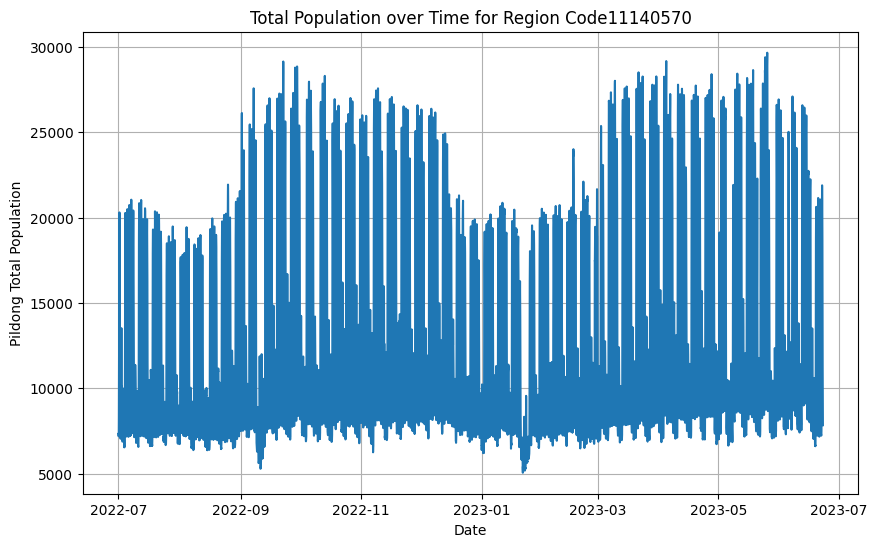

In [77]:
import matplotlib.pyplot as plt

# 필동 인구밀집 정보 시각화
plt.figure(figsize=(10,6))
plt.plot(select_info['Datetime'], select_info['TotalPop'])
plt.title(f'Total Population over Time for Region Code {select_Dong["행정동코드"].iloc[0]}')
plt.xlabel('Date')
plt.ylabel('Pildong Total Population')
plt.grid(True)
plt.show()

In [79]:
thing = select_info[select_info['Datetime'] == "2023-06-22 20:00:00"]
thing

,RegionCode,TotalPop,Datetime
222193,11140570,11189.2228,2023-06-22 20:00:00
